In [27]:
import tweepy

In [28]:
auth = tweepy.OAuthHandler('zrWEaZogbmS8XQ9Bu2sAFq2Tp', 'yUaqvWvK1lMTNr5yQgx3EZhdUT93eQpMCsLEwxX5qvR5qNMqY8')
auth.set_access_token('1451650917313363968-d94Q8vdcgQctGWH0zcbkIxtHK43Rru', 'YWHvFp9LrS723b17sWb3BW9HIHjnaW3cWS5X2AjoDbQGw')
api = tweepy.API(auth)

In [29]:
userID = "elonmusk"

In [30]:
tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False, 
                           tweet_mode = 'extended'
                           )

for info in tweets[:5]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

In [31]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

In [32]:
from pandas import DataFrame
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(10)

,id,created_at,favorite_count,retweet_count,text
0,1454966640534343680,2021-11-01 00:20:53+00:00,4593,375,@Tesmanian_com Sanjay deserves a lot of credit...
1,1454951269504888838,2021-10-31 23:19:48+00:00,6169,248,@ashleevance 🤣
2,1454933533814927365,2021-10-31 22:09:20+00:00,1890,143,@garycruz @truth_tesla @zshahan3 @garyblack00 ...
3,1454930023966773249,2021-10-31 21:55:23+00:00,4208,623,@WFPChief @DrEliDavid What happened here? http...
4,1454929736799490048,2021-10-31 21:54:15+00:00,1574,183,@truth_tesla @zshahan3 @garyblack00 @WholeMars...
5,1454929058706432002,2021-10-31 21:51:33+00:00,1569,173,@truth_tesla @zshahan3 @garyblack00 @WholeMars...
6,1454926841467256835,2021-10-31 21:42:44+00:00,5159,896,@truth_tesla @zshahan3 @garyblack00 @WholeMars...
7,1454921466500222977,2021-10-31 21:21:23+00:00,10455,1199,@WFPChief @DrEliDavid Please publish your curr...
8,1454920409212669954,2021-10-31 21:17:11+00:00,15607,998,"@SawyerMerritt @Tesla By definition, since I o..."
9,1454894791444111360,2021-10-31 19:35:23+00:00,4304,324,@ZaidJilani @joerogan @FoxNews Austin should b...


In [33]:
search_words = "Billy Joel"
new_search = search_words + " -filter:retweets"

In [36]:
tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(5)

In [45]:
for tweet1 in api.search_tweets(q="muppet, kermit, good", lang="en"):
    print(tweet1.text)

@gaydelemeydele so we think miss piggy would be christine and kermit would be raoul. phantom would be played by som… https://t.co/p8ndk196rG
@ScottDAmore I mentioned you in a very good way remind me of Kermit running the Muppet Show. You need a Scooter for… https://t.co/ehBnwSUz9Z
The running gag in The Great Muppet capper where people keep mixing up Fozzie and Kermit is such a good bit.
@arichmondScot @NicolaSturgeon Good idea but Kermit is already booked! When asked if a muppet was to be the host Ke… https://t.co/HWJ8qOb9mj
Man if AEW let me sign talent for them can you imagine how good it would be?

Estelle Getty v. Jon Moxley, Kermit t… https://t.co/Lu8EES2Qqc
Muppets Haunted Mansion was really good! I really enjoy seeing Gonzo do some more crazy shit, and generally I enjoy… https://t.co/D1ngEKoItx
@DonaldJTrumpJr Want a good laugh? Imagine dong jr and his Kermit the frog like muppet voice yelling "I demand a retraction!" Lolz


In [42]:
df['text_new'] = ''

import re

for i in range(len(df['text'])):
    m = re.search('(?<=:)(.*)', df['text'][i])
    try:
        df['text_new'][i]=m.group(0)
    except AttributeError:
        df['text_new'][i]=df['text'][i]
        
print(df['text_new'])        

0     @Tesmanian_com Sanjay deserves a lot of credit...
1                                        @ashleevance 🤣
2     @garycruz @truth_tesla @zshahan3 @garyblack00 ...
3                                     //t.co/WWfbZURtdh
4                                     //t.co/WAWkkEMvS5
5                                     //t.co/DxY57KUcmf
6     @truth_tesla @zshahan3 @garyblack00 @WholeMars...
7     @WFPChief @DrEliDavid Please publish your curr...
8     @SawyerMerritt @Tesla By definition, since I o...
9     @ZaidJilani @joerogan @FoxNews Austin should b...
10                                     @BillyM2k ♥️♥️♥️
11    Tuition is in Dogecoin &amp; u get a discount ...
12    @DrEliDavid But it must be open source account...
13    @DrEliDavid If WFP can describe on this Twitte...
14             @ErcXspace @NASASpaceflight Pretty close
15    @hsumacher @Tesla Indeed. The factory was empt...
16                                          @PPathole 🤣
17                                    //t.co/OtH

<ipython-input-42-30ff137475eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_new'][i]=df['text'][i]
<ipython-input-42-30ff137475eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_new'][i]=m.group(0)


Text(0.5, 1.0, 'elon')

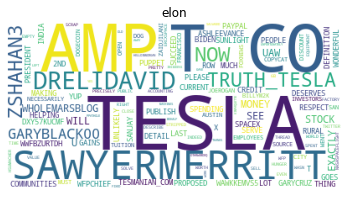

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add("https")

wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df['text_new'].str.upper()]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("elon")


In [60]:
number_of_tweets = 10

In [64]:
auth_api = tweepy.API(auth)
timeline = auth_api.user_timeline(user_id=userID,count=number_of_tweets,tweet_mode="extended")
textonly_tweets = [tweet.full_text for tweet in timeline]
print(*textonly_tweets, sep = "\n")

In [66]:
df['text_new'].unique

<bound method Series.unique of 0     @Tesmanian_com Sanjay deserves a lot of credit...
1                                        @ashleevance 🤣
2     @garycruz @truth_tesla @zshahan3 @garyblack00 ...
3                                     //t.co/WWfbZURtdh
4                                     //t.co/WAWkkEMvS5
5                                     //t.co/DxY57KUcmf
6     @truth_tesla @zshahan3 @garyblack00 @WholeMars...
7     @WFPChief @DrEliDavid Please publish your curr...
8     @SawyerMerritt @Tesla By definition, since I o...
9     @ZaidJilani @joerogan @FoxNews Austin should b...
10                                     @BillyM2k ♥️♥️♥️
11    Tuition is in Dogecoin &amp; u get a discount ...
12    @DrEliDavid But it must be open source account...
13    @DrEliDavid If WFP can describe on this Twitte...
14             @ErcXspace @NASASpaceflight Pretty close
15    @hsumacher @Tesla Indeed. The factory was empt...
16                                          @PPathole 🤣
17               